<a href="https://colab.research.google.com/github/rvoljanin/neuraluniversity/blob/master/notebooks/ai/exercise2/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добавляем библиотеки



In [2]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.model_selection import train_test_split

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

Описываем модель

In [3]:
# Функция пересоздаёт пустую сеть
def createModel():
    model = Sequential() # Создаём сеть прямого распространения
    model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
    model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
    model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
    print(model.summary()) #Вывод структуры модели

    return model # Возвращаем созданную сеть

Визуализируем результаты обучения

In [4]:
def printHistory(hist):
    plt.figure(figsize=(10,10))
    # Выводим график точности на обучающей выборке
    # label - имя графика в легенде
    plt.plot(hist.history['accuracy'], label='Доля верных ответов на обучающем наборе')

    # Выводим график точности на проверочной выборке
    plt.plot(hist.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

    # Выводим подписи осей
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')

    # Выводим легенду
    plt.legend()
    plt.show()

    # Выводим графики ошибки
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['loss'], label='Ошибка на обучающем наборе')
    plt.plot(hist.history['val_loss'], label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

Формируем наборы данных

In [6]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
Тренируем три модели с тестовыми базами в 50000, 10000 и 500 изображений

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.2264 - accuracy: 0.9325 - val_loss: 0.0992 - val_accuracy: 0.9719
Epoch 2/50
391/391 [==============================] - 1s 4ms/step - loss: 0.0794 - accuracy: 0.9755 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 3/50
391/391 [==============================] - 1s 4ms/step - loss: 0.0524 - accura

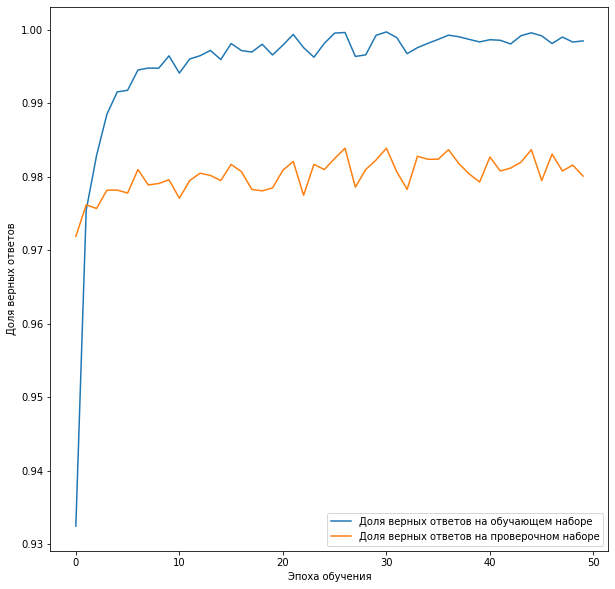

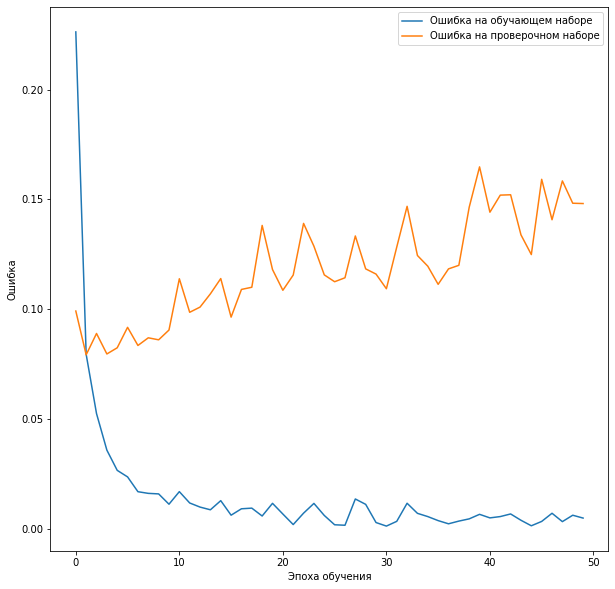

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
79/79 [==============================] - 1s 17ms/step - loss: 0.4622 - accuracy: 0.8675 - val_loss: 0.2599 - val_accuracy: 0.9218
Epoch 2/50
79/79 [==============================] - 1s 15ms/step - loss: 0.1719 - accuracy: 0.9510 - val_loss: 0.2011 - val_accuracy: 0.9388
Epoch 3/50
79/79 [==============================] - 1s 16ms/step - loss: 0.1012 - accuracy:

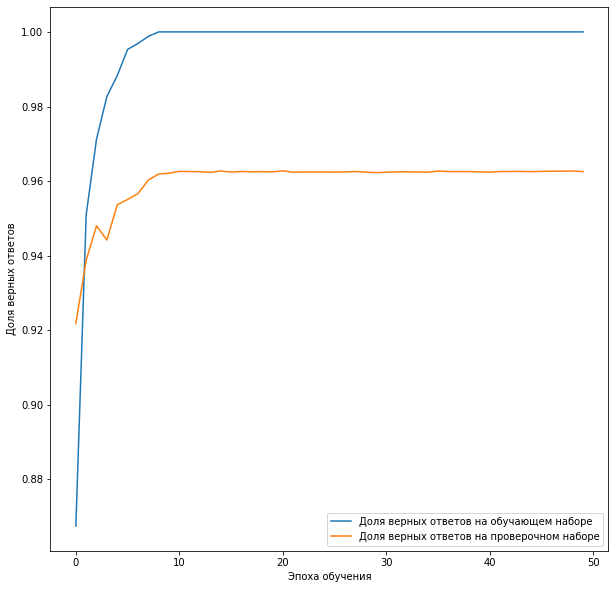

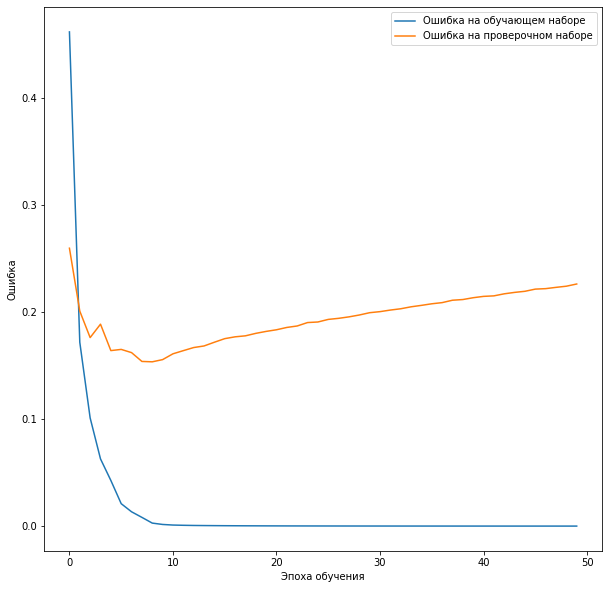

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
4/4 [==============================] - 1s 346ms/step - loss: 1.8864 - accuracy: 0.4620 - val_loss: 1.2987 - val_accuracy: 0.6962
Epoch 2/50
4/4 [==============================] - 1s 320ms/step - loss: 0.8508 - accuracy: 0.8260 - val_loss: 0.7757 - val_accuracy: 0.7685
Epoch 3/50
4/4 [==============================] - 1s 297ms/step - loss: 0.4305 - accuracy: 0.

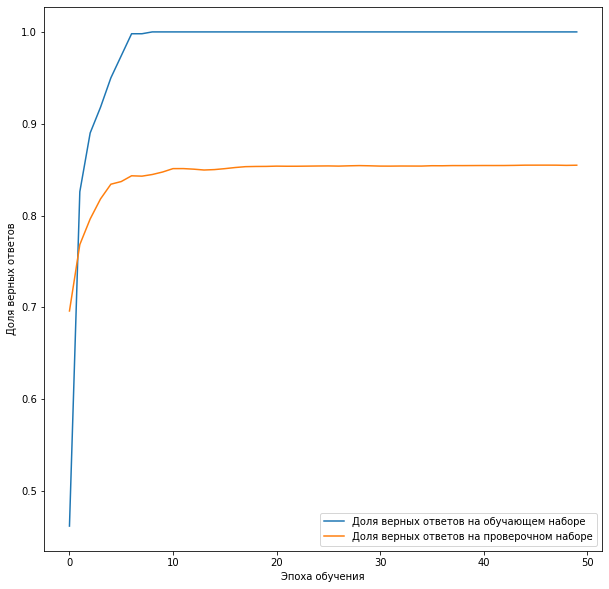

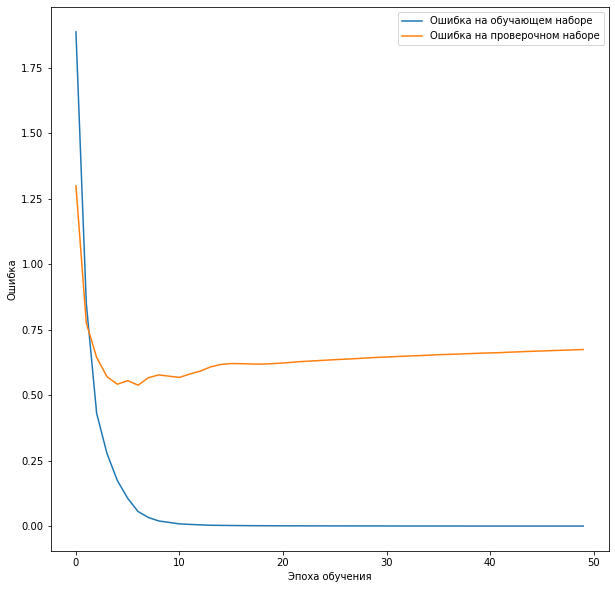

In [10]:
for test_sample_size in (50000,10000,500): # три модели с разным размером тестовой и валидационной базы
    model = createModel() # создаём пустую модель
    history = model.fit(x_train[:test_sample_size], y_train[:test_sample_size], batch_size=128, epochs=50, verbose=1, validation_data=(x_train[test_sample_size:],y_train[test_sample_size:])) # тренируем модель на тестовой выборке
    printHistory(history) # визуализируем результаты обучения


Выводы
- на максимальном размере базы как и на более мелких происходит переобучение модели. Однако на базе максимального размера график ошибки на обучающем наборе не уходит в ноль даже на 50 эпохе. Из этого можно сделать вывод что модель всё ещё не заучила базу.
- на базах в 10000 и 500 изображений модели демонстрируют схожее поведение, переобучение начинается в первые 5 эпох, при этом ошибка на тестовых данных уходит в ноль в те же 5 эпох и больше не менятся
- на графиках отражающих количество верных ответов на валидационных данных прослеживается чёткая зависимость между качество распознавания и размером тестовой выборки.
- на графике количества верных ответов модели с максимальной тестовой базой наблюдаются постоянные колебания от эпохи к эпохе, которые оставляю надежду улучшить этот показатель, на графиках других моделей наблюдается достижение максимального значения "потолка"

- судя по результатам размер базы для обучения напрямую влияет на результирующую точность модели.
- переобучение модели начинается практически в одно и то же время(эпоху) независимо от размера базы.

Функция создающая модель 4 Dense, 3 Dropout и 3 BatchNormalization слоя

In [12]:
# Функция пересоздаёт пустую сеть
def createModel3():
    model = Sequential() # Создаём сеть прямого распространения
    model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(400, activation="relu"))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
    print(model.summary()) #Вывод структуры модели

    return model # Возвращаем созданную сеть

Тренируем эту модель на базах разных размеров

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 800)               3200      
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_14 (Dense)             (None, 400)              

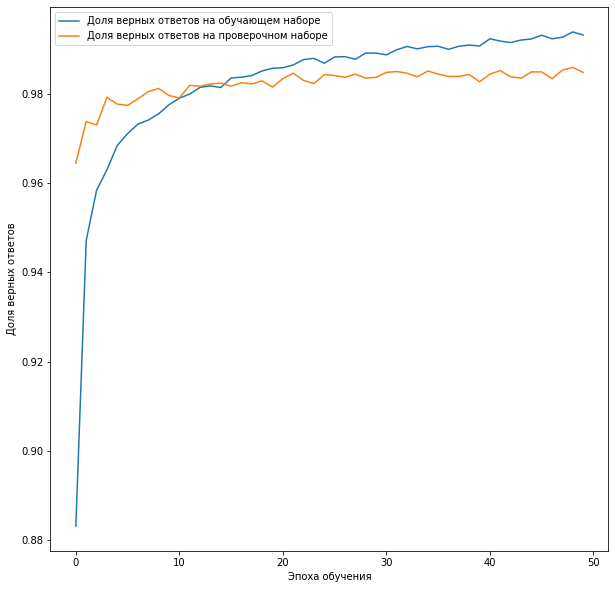

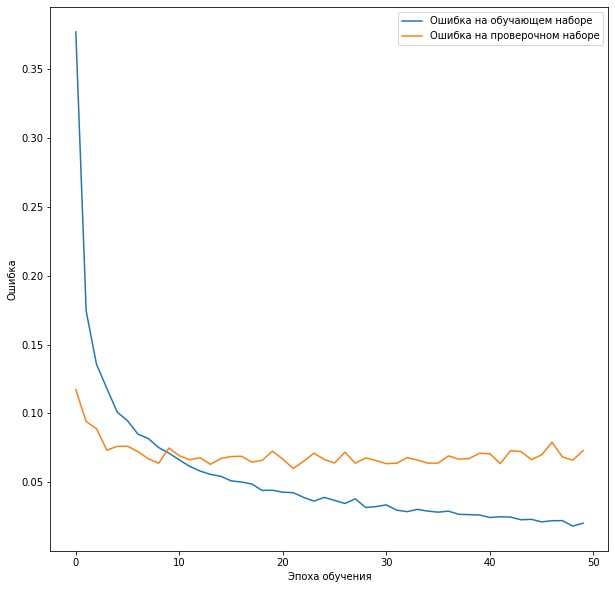

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 800)               3200      
_________________________________________________________________
dense_17 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 400)               1600      
_________________________________________________________________
dense_18 (Dense)             (None, 400)              

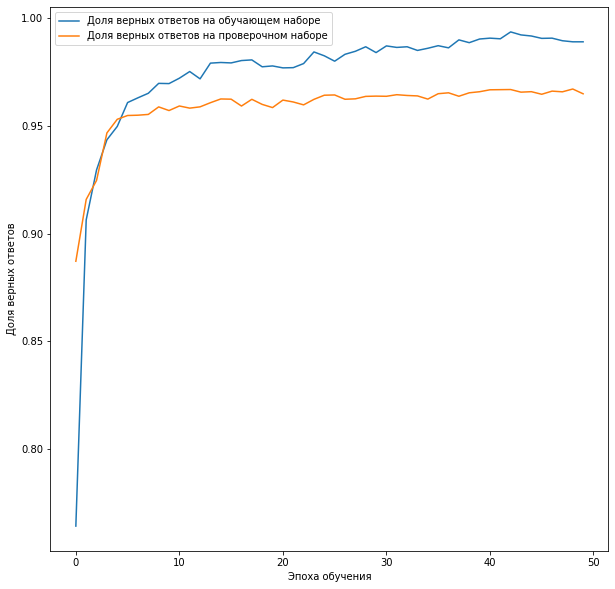

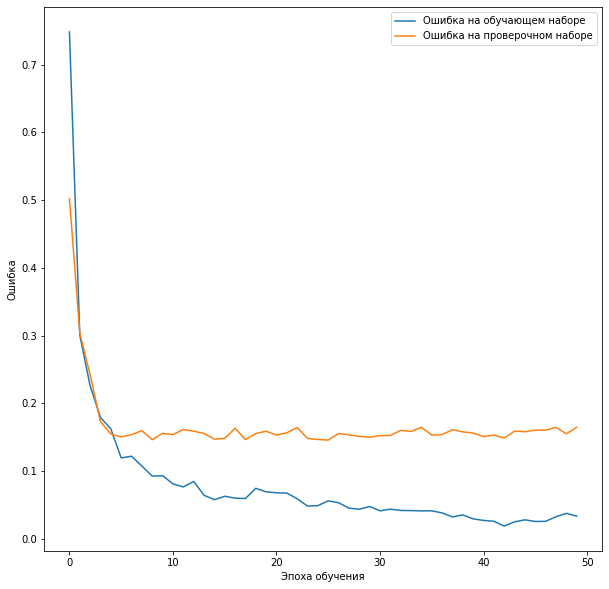

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 800)               3200      
_________________________________________________________________
dense_21 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dense_22 (Dense)             (None, 400)              

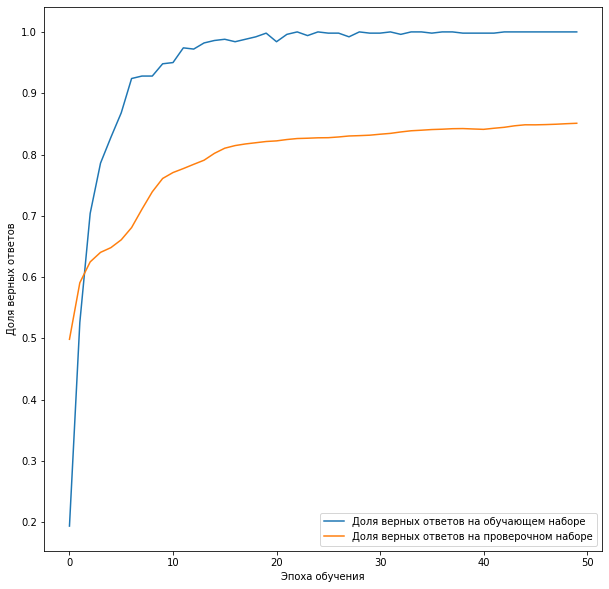

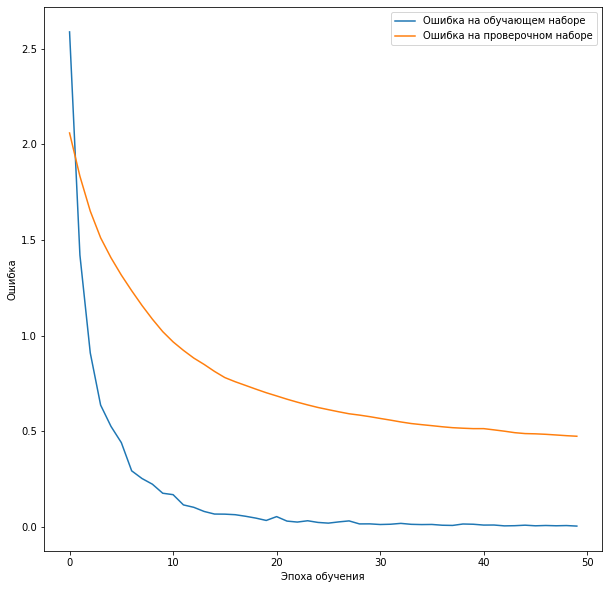

In [13]:
for test_sample_size in (50000,10000,500): # три модели с разным размером тестовой и валидационной базы
    model = createModel3() # создаём пустую модель
    history = model.fit(x_train[:test_sample_size], y_train[:test_sample_size], batch_size=128, epochs=50, verbose=1, validation_data=(x_train[test_sample_size:],y_train[test_sample_size:])) # тренируем модель на тестовой выборке
    printHistory(history) # визуализируем результаты обучения

Выводы
- время обучения на максимальном размере базы ощутимо выросло, это свидетельствует об увеличении сложности рассчётов(количества операций)
- на базах в 50000 и 10000 эффект переобучения практически не наблюдается, ошибка на валидационных данных колеблется в узком коридоре
- на маленькой базе в 500 изображений ошибка на валидационных данных продолжает стабильное падение даже на 50 эпохе, демонстрируя при этом значительно снижение по сравнению с первым экспериментом
- при этом на базе в 500 изображений график доли верных ответов хоть и продолжает стабильный рост, на 50 эпохах не отличается от первого эксперимента
- этот же эффект наблюдается и на остальных базах

- похоже что Dropout очень эффективен в подавлении эффекта переобучения, при этом чем меньше база тем эффективнее
- не до конца понятно как связано уменьшение ошибки на валидационных данных и "неизменность" доли верных ответов на тех же данных между экспериментами. Интуитивно снижение ошибки должно было повлеч увеличение доли верных ответов, но этого не происходит
- не заметил эффекта от батч нормализации, похоже что данные MNIST уже и так не плохо нормализованы